In [24]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import string
import math

## Question 3.1

In [5]:
import os

# Define the training data directory
train_dir = "languageID/"


charset = "abcdefghijklmnopqrstuvwxyz "
files_char = [x for x in "0123456789"]
print(files_char)

alpha = 1/2

e_ct = 0
j_ct = 0
s_ct= 0

num_classes = 3
for filename in os.listdir(train_dir):
    
    lang = filename[0]
    #get the first 9 files for each language
    file_chr = filename[1:filename.index('.txt')]
    # print(file_chr)
    
    if lang == "e" and int(file_chr)<10:
        e_ct += 1
    elif lang == "j" and int(file_chr)<10:
        j_ct += 1
    elif lang == "s" and int(file_chr)<10:
        s_ct += 1

print(e_ct, j_ct, s_ct)

ct = e_ct + j_ct + s_ct
#prior probabilities with laplace smoothing
e_prior = (e_ct + alpha) / (ct + alpha * num_classes)
j_prior = (j_ct + alpha) / (ct + alpha * num_classes)
s_prior = (s_ct + alpha) / (ct + alpha * num_classes)

print("Prior probabilities:")
print("English: ", e_prior)
print("Japanese: ", j_prior)
print("Spanish: ", s_prior)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
10 10 10
Prior probabilities:
English:  0.3333333333333333
Japanese:  0.3333333333333333
Spanish:  0.3333333333333333


## Question 3.2

In [14]:

charset = "abcdefghijklmnopqrstuvwxyz "
char_list = {char:0 for char in charset}
for filename in os.listdir(train_dir):
   lang = filename[0]
   if lang == "e":
      filepath = "languageID/" + filename
      with open(filepath) as file:
         for line in file:
            for char in line:
               if char not in char_list:
                  continue
               else:

                  char_list[char] += 1


num_e = sum(char_list.values())
#print(num_e)
theta_e = [(char_list[char] + alpha) / (num_e + 27*alpha) for char in charset]
#print(theta_e)
print(theta_e)

[0.06163156484080746, 0.011948257134393207, 0.021794636685522437, 0.022133194148598514, 0.1059543793818505, 0.019988996882450028, 0.016010946691306125, 0.04656575773392205, 0.05471934996967089, 0.0008605002186516949, 0.003992156752105404, 0.030145720774732328, 0.02216140727052152, 0.05742780967427951, 0.06507356571541424, 0.016405930398228217, 0.0006912214871136566, 0.05054380792506595, 0.06377576210695594, 0.08329924247767637, 0.02565983438897431, 0.00918337118593858, 0.015474897374769005, 0.0011990576817277716, 0.013387126352466533, 0.0005219427555756182, 0.17944956199128215]


In [15]:
theta_e = [round(x, 4) for x in theta_e]
print(theta_e)

[0.0616, 0.0119, 0.0218, 0.0221, 0.106, 0.02, 0.016, 0.0466, 0.0547, 0.0009, 0.004, 0.0301, 0.0222, 0.0574, 0.0651, 0.0164, 0.0007, 0.0505, 0.0638, 0.0833, 0.0257, 0.0092, 0.0155, 0.0012, 0.0134, 0.0005, 0.1794]


## Question 3.3

In [16]:

#For japanese and spanish
charset = "abcdefghijklmnopqrstuvwxyz "
char_list = {char:0 for char in charset}
for filename in os.listdir(train_dir):
   lang = filename[0]
   if lang == "j":
      filepath = "languageID/" + filename
      with open(filepath) as file:
         for line in file:
            for char in line:
               if char not in char_list:
                  continue
               else:

                  char_list[char] += 1


num_j = sum(char_list.values())

theta_j = [(char_list[char] + alpha) / (num_j + 27*alpha) for char in charset]

print(theta_j)

theta_j = [round(x, 4) for x in theta_j]
print(theta_j)

char_list = {char:0 for char in charset}
for filename in os.listdir(train_dir):
   lang = filename[0]
   if lang == "s":
      filepath = "languageID/" + filename
      with open(filepath) as file:
         for line in file:
            for char in line:
               if char not in char_list:
                  continue
               else:

                  char_list[char] += 1


num_s = sum(char_list.values())

theta_s = [(char_list[char] + alpha) / (num_s + 27*alpha) for char in charset]

print(theta_s)

theta_s = [round(x, 4) for x in theta_s]
print(theta_s)

[0.13212646167171935, 0.00992637505413599, 0.005214378518839324, 0.016370723256821134, 0.059991338241663056, 0.0034820268514508443, 0.014880900822867043, 0.031476829796448676, 0.09896925075790386, 0.0020961455175400605, 0.05718492854049372, 0.001195322650498051, 0.04083152880034647, 0.056942399307059334, 0.090376786487657, 0.0007102641836292768, 5.1970550021654394e-05, 0.04259852750108272, 0.04259852750108272, 0.05798181030749242, 0.07028150714595063, 0.00019055868341273278, 0.020285838025119098, 1.7323516673884798e-05, 0.013841489822433954, 0.007743611953226505, 0.12263317453443048]
[0.1321, 0.0099, 0.0052, 0.0164, 0.06, 0.0035, 0.0149, 0.0315, 0.099, 0.0021, 0.0572, 0.0012, 0.0408, 0.0569, 0.0904, 0.0007, 0.0001, 0.0426, 0.0426, 0.058, 0.0703, 0.0002, 0.0203, 0.0, 0.0138, 0.0077, 0.1226]
[0.10653656355302873, 0.009598032483191465, 0.03674720922433205, 0.040484213552230225, 0.11234968139642589, 0.007362217928038712, 0.007202516888384944, 0.0047750610856476675, 0.05000239551559481, 0.0

## Question 3.4

In [18]:
#Vocab refer to the number of characters in the dataset
vocab = [x for x in charset]
with open('languageID/e10.txt', 'r', encoding='utf-8') as file:
    text = file.read()

v = [0] * len(vocab)
for word in text:
    if word in vocab:
        i = vocab.index(word)
        v[i] += 1

print(v)

[164, 32, 53, 57, 311, 55, 51, 140, 140, 3, 6, 85, 64, 139, 182, 53, 3, 141, 186, 225, 65, 31, 47, 4, 38, 2, 498]


## Question 3.5

In [29]:
## Taking e10.txt as the text document

vocab = "abcdefghijklmnopqrstuvwxyz "
labels = ["e", "j", "s"]
alpha = 0.5
files_char = [x for x in "0123456789"]
charcter_count_arr = {label: np.zeros(len(vocab)) for label in labels}

# Each character count
for filename in os.listdir("languageID"):
    file_chr = filename[1:filename.index('.txt')]
    ## Take only the training data
    if int(file_chr)<10:
        label = filename[0]
        with open(os.path.join("languageID/", filename)) as f:
            text = f.read().lower()
            for char in text:
                if char in vocab:
                    charcter_count_arr[label][vocab.index(char)] += 1

class_totals = {label: np.sum(charcter_count_arr[label]) for label in labels}
# print(class_totals)

# Prior probability
prior_probs = {label: (np.sum([filename.startswith(label) for filename in os.listdir("languageID/")]) + alpha) 
               / (len(os.listdir("languageID/")) + alpha * len(labels)) for label in labels}
# print(prior_probs)

cond_probs = {label: np.log((charcter_count_arr[label] + alpha) / (class_totals[label] + alpha * len(vocab))) for label in labels}
# print(cond_probs)

# Test document
with open("languageID/e10.txt") as f:
    text = f.read().lower()

likelihoods = {label: np.sum([cond_probs[label][vocab.index(char)] for char in text if char in vocab]) for label in labels}
print(likelihoods)
likelihood_exp = {}
for x in likelihoods:
    ans = np.exp(likelihoods[x])
    print(likelihoods[x], ans)
    likelihood_exp[x] = ans
print(likelihood_exp)

{'e': -7841.865447060636, 'j': -8771.433079075032, 's': -8467.282044010557}
-7841.865447060636 0.0
-8771.433079075032 0.0
-8467.282044010557 0.0
{'e': 0.0, 'j': 0.0, 's': 0.0}


## Question 3.6

In [30]:
## From the previous answe
posterior_probs = {label: np.log(prior_probs[label]) + likelihoods[label] for label in labels}
print(posterior_probs)

# Converting it into the exponential distribution
posterior_exp = {}
for x in likelihoods:
    ans = np.exp(likelihoods[x])
    print(likelihoods[x], ans)
    posterior_exp[x] = ans
print(posterior_exp)

{'e': -7842.964059349304, 'j': -8772.5316913637, 's': -8468.380656299225}
-7841.865447060636 0.0
-8771.433079075032 0.0
-8467.282044010557 0.0
{'e': 0.0, 'j': 0.0, 's': 0.0}


## Question 3.7

In [44]:
import os

# Load test set files and extract true class labels and bag-of-characters representations
files_char = [x for x in "0123456789"]
true_labels = []
predicted_labels = []

files = ['10.txt', '11.txt', '12.txt', '13.txt', '14.txt', '15.txt', '16.txt', '17.txt', '18.txt', '19.txt']
for file in files:
    # file_chr = file[1:file.index('.txt')]
    # print(file_chr)
    # if int(file_chr)>=10:
    for i in ['s', 'j', 'e']:
        # Load the document to be classified
        true_label = i
        true_labels.append(true_label)
        filename = "languageID/" + i + file
        with open(filename) as f:
            text = f.read()

        likelihood = {label: np.sum([cond_probs[label][vocab.index(char)] for char in text if char in vocab]) for label in labels}
        predicted_label = max(likelihood, key=likelihood.get)
        likelihood.clear()
        predicted_labels.append(predicted_label)

# Generate confusion matrix
confusion_matrix = np.zeros((len(labels), len(labels)))


docs = 30

for i in range(docs):
    true_label = true_labels[i]
    predicted_label = predicted_labels[i]
    true_idx = labels.index(true_label)
    pred_idx = labels.index(predicted_label)
    confusion_matrix[true_idx][pred_idx] += 1


print('Confusion matrix:')
print('\t' + '\t'.join(labels))
for i in range(len(labels)):
    print(f'{labels[i]}:\t' + '\t'.join([str(int(x)) for x in confusion_matrix[i]]))

acc = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)
print(acc)

Confusion matrix:
	e	j	s
e:	10	0	0
j:	0	10	0
s:	0	0	10
1.0


## Question 4.2

In [17]:
## Help from chatgpt and other online resources
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Download and load the MNIST dataset using PyTorch
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Softmax activation function
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

# Define the cross-entropy loss function
def cross_entropy_loss(y, y_hat):
    return -np.sum(y * np.log(y_hat))

# Training parameters
learning_rate = 0.1
num_epochs = 10
batch_size = 64

# Set the dimensions of the layers
input_size = 28*28
hidden_size = 300
output_size = 10

# Initialize the weights randomly
W1 = np.random.uniform(-1, 1, size=(hidden_size, input_size))
W2 = np.random.uniform(-1, 1, size=(output_size, hidden_size))

# Set the learning rate and number of epochs
lr = 0.1
n_epochs = 10

train_loss_history = []
# Train the network
for epoch in range(n_epochs):
    train_loss = 0
    for i, (X, y) in enumerate(trainloader):
        X = X.reshape(-1, input_size)
        y = torch.nn.functional.one_hot(y, num_classes=output_size).numpy()
        
        # Forward pass
        z1 = np.dot(X, W1.T)
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2.T)
        y_hat = softmax(z2.T)
        
        # Compute the loss
        loss = cross_entropy_loss(y.T, y_hat)
        train_loss += loss
        
        # Backward pass
        delta2 = y_hat - y.T
        delta1 = np.dot(delta2.T, W2) * a1 * (1 - a1)
        dW2 = np.dot(delta2, a1) / X.shape[0]
        dW1 = np.dot(delta1.T, X) / X.shape[0]
        
        # Update the weights
        W1 -= lr * dW1
        W2 -= lr * dW2
        
    train_loss /= len(trainloader)
    train_loss_history.append(train_loss)
    print(f'Epoch {epoch+1}, train_loss: {train_loss}')


Epoch 1, train_loss: 53.4099287438623
Epoch 2, train_loss: 26.398608211436724
Epoch 3, train_loss: 21.492543454218104
Epoch 4, train_loss: 18.743322654431527
Epoch 5, train_loss: 16.795136601814328
Epoch 6, train_loss: 15.348875629594781
Epoch 7, train_loss: 14.174540592695331
Epoch 8, train_loss: 13.246815554409364
Epoch 9, train_loss: 12.426512363740303
Epoch 10, train_loss: 11.70447554507901


[53.4099287438623, 26.398608211436724, 21.492543454218104, 18.743322654431527, 16.795136601814328, 15.348875629594781, 14.174540592695331, 13.246815554409364, 12.426512363740303, 11.70447554507901]


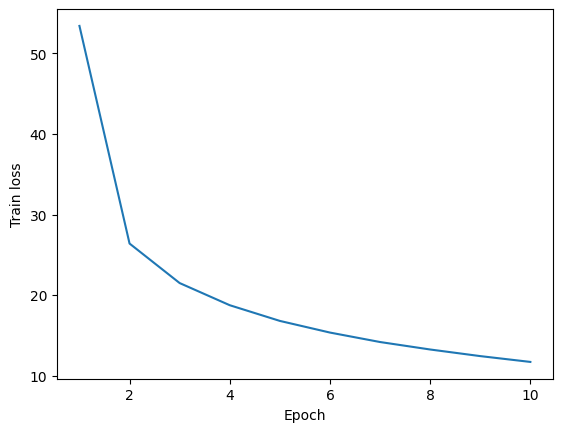

In [18]:
# Plot results
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(1, 11, 1) , train_loss_history)
plt.xlabel("Epoch")
plt.ylabel("Train loss")
print(train_loss_history)

In [20]:
testloss = 0

prev_loss = 0

for i, (X, y) in enumerate(testloader):
    X = X.reshape(-1, input_size)
    y = torch.nn.functional.one_hot(y, num_classes=output_size).numpy()
          
    # Forward pass
    z1 = np.dot(X, W1.T)
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2.T)
    y_hat = softmax(z2.T)
          
    # Compute the loss
    loss = cross_entropy_loss(y.T, y_hat)
    testloss += loss
    if i%64==0:
        loss_new_batch = loss-prev_loss
        print(loss_new_batch)
        prev_loss = loss_new_batch
        
testloss /= len(testloader)
testloss

12.053587593719705
-0.5365155503507868
9.016180555379789


14.246087512361711

## Question 4.3

In [21]:


import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Download and load the MNIST dataset using PyTorch
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define the two-layer neural network
class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Initialize the neural network
input_size = 28 * 28
hidden_size = 300
output_size = 10
net = TwoLayerNet(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)

# Training loop
num_epochs = 10
loss_list = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for data in trainloader:
        inputs, labels = data
        inputs = inputs.view(-1, input_size)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    loss_list.append(running_loss/len(trainloader))
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

# Test the neural network
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.view(-1, input_size)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test dataset: {100 * correct / total}%')



Epoch 1, Loss: 2.0615909916759807
Epoch 2, Loss: 1.780327030209336
Epoch 3, Loss: 1.7046862789816948
Epoch 4, Loss: 1.6537601763505672
Epoch 5, Loss: 1.6402590630659417
Epoch 6, Loss: 1.6329381080832817
Epoch 7, Loss: 1.6281848703620276
Epoch 8, Loss: 1.6246345948054592
Epoch 9, Loss: 1.6216517351329454
Epoch 10, Loss: 1.6193161153081637
Accuracy on the test dataset: 85.51%


[2.0615909916759807, 1.780327030209336, 1.7046862789816948, 1.6537601763505672, 1.6402590630659417, 1.6329381080832817, 1.6281848703620276, 1.6246345948054592, 1.6216517351329454, 1.6193161153081637]


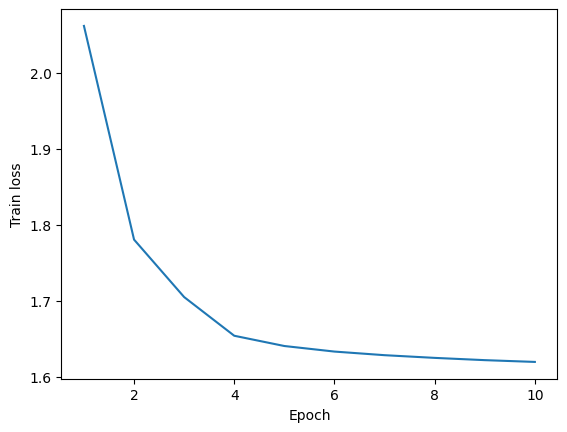

In [22]:
# Plot results
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(1, 11, 1) , loss_list)
plt.xlabel("Epoch")
plt.ylabel("Train loss")
print(loss_list)

In [24]:


net.eval()
test_loss = 0
correct = 0
test_losses = []
c = 0
with torch.no_grad():
    for data in testloader:
        c+=1
        # data, target = data, target
        # output = net(data)
        images, labels = data
        images = images.view(-1, input_size)
        outputs = net(images)
        loss = criterion(outputs, labels).item()
        if c%64==1:
          print(loss)
        test_loss += loss # sum up batch loss
        test_losses.append(loss)
        pred = outputs.argmax(dim=1, keepdim=True) # get the index of the max probability
        correct += pred.eq(labels.view_as(pred)).sum().item()

test_loss /= len(testloader.dataset)

print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(testloader.dataset),
    100. * correct / len(testloader.dataset)))


1.6019313335418701
1.5979959964752197
1.5663931369781494

Test set: Average loss: 0.0253, Accuracy: 8551/10000 (86%)



## Question 4.4

In [26]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Download and load the MNIST dataset using PyTorch
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Softmax activation function
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

# Define the cross-entropy loss function
def cross_entropy_loss(y, y_hat):
    return -np.sum(y * np.log(y_hat))

# Training parameters
learning_rate = 0.1
num_epochs = 10
batch_size = 64

# Set the dimensions of the layers
input_size = 28*28
hidden_size = 300
output_size = 10

# Initialize the weights randomly
W1 = np.zeros(shape=(hidden_size, input_size))
W2 = np.zeros(shape=(output_size, hidden_size))

# Set the learning rate and number of epochs
lr = 0.1
n_epochs = 10

train_loss_history_zeros = []
# Train the network
for epoch in range(n_epochs):
    train_loss = 0
    for i, (X, y) in enumerate(trainloader):
        X = X.reshape(-1, input_size)
        y = torch.nn.functional.one_hot(y, num_classes=output_size).numpy()
        
        # Forward pass
        z1 = np.dot(X, W1.T)
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2.T)
        y_hat = softmax(z2.T)
        
        # Compute the loss
        loss = cross_entropy_loss(y.T, y_hat)
        train_loss += loss
        
        # Backward pass
        delta2 = y_hat - y.T
        delta1 = np.dot(delta2.T, W2) * a1 * (1 - a1)
        dW2 = np.dot(delta2, a1) / X.shape[0]
        dW1 = np.dot(delta1.T, X) / X.shape[0]
        
        # Update the weights
        W1 -= lr * dW1
        W2 -= lr * dW2
        
    train_loss /= len(trainloader)
    train_loss_history_zeros.append(train_loss)
    print(f'Epoch {epoch+1}, train_loss: {train_loss}')


Epoch 1, train_loss: 147.66223912008664
Epoch 2, train_loss: 143.78905750710132
Epoch 3, train_loss: 136.46576073526438
Epoch 4, train_loss: 133.8279621149803
Epoch 5, train_loss: 132.56534436839402
Epoch 6, train_loss: 131.81679822437027
Epoch 7, train_loss: 131.30647006190745
Epoch 8, train_loss: 130.93801770788295
Epoch 9, train_loss: 130.62831890724075
Epoch 10, train_loss: 130.40178864244757


[147.66223912008664, 143.78905750710132, 136.46576073526438, 133.8279621149803, 132.56534436839402, 131.81679822437027, 131.30647006190745, 130.93801770788295, 130.62831890724075, 130.40178864244757]


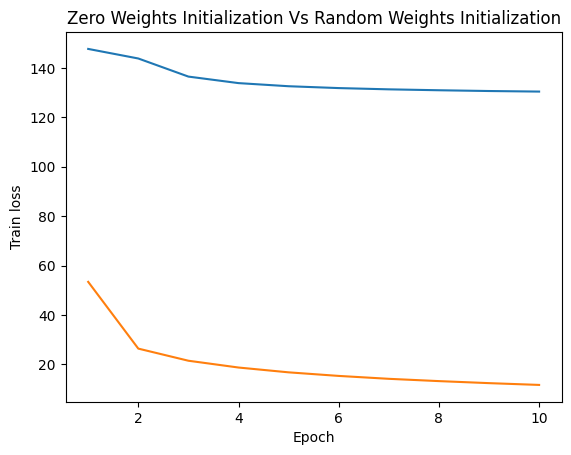

In [32]:
# Plot results
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(1, 11, 1) , train_loss_history_zeros)
plt.plot(np.arange(1, 11, 1) , train_loss_history)
plt.xlabel("Epoch")
plt.ylabel("Train loss")
plt.title("Zero Weights Initialization Vs Random Weights Initialization")
print(train_loss_history_zeros)

In [28]:
testloss = 0

prev_loss = 0

for i, (X, y) in enumerate(testloader):
    X = X.reshape(-1, input_size)
    y = torch.nn.functional.one_hot(y, num_classes=output_size).numpy()
          
    # Forward pass
    z1 = np.dot(X, W1.T)
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2.T)
    y_hat = softmax(z2.T)
          
    # Compute the loss
    loss = cross_entropy_loss(y.T, y_hat)
    testloss += loss
    if i%64==0:
        loss_new_batch = loss-prev_loss
        print(loss_new_batch)
        prev_loss = loss_new_batch
        
testloss /= len(testloader)
print(testloss)

134.47520574521116
-1.1008242255891787
129.07517322692786


129.98588954967278